# Insurance Claim Fraud Detection
## Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Independent Variables
1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [5]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Statistical Analysis

In [7]:
df.duplicated('policy_number').sum()

0

In [8]:
df.isin([' ','NA','-']).sum().any()

False

In [9]:
df.isin(['?']).sum().any()

True

In [10]:
# Let replace '?' with np.NaN

df=df.replace('?',np.NaN)

In [11]:
# Missing value check
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

### Observation :
1. _c39 columns with 100 % null value. We drop it.
2. 'property_damage','police_report_available','collision_type' contain missing values.

In [12]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [13]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace = True)

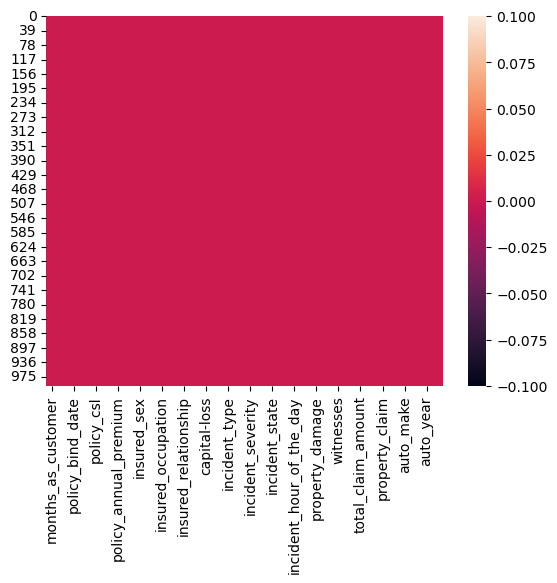

In [14]:
# Heatmap of missing value
sns.heatmap(df.isnull())
plt.show()

### Observation:
No more missing values.

In [15]:
#In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [16]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [17]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [18]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [19]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

In [20]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

In [21]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [22]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

### Statistical Matrix

In [23]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,52761.94000,7433.420000,7399.570000,37928.950000,15.448000,6.559000,2001.604000,13.08400,3.407000,9.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,26401.53319,4880.951853,4824.726179,18886.252893,8.850176,3.391758,7.360391,10.44318,3.276291,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,100.00000,0.000000,0.000000,70.000000,1.000000,1.000000,1990.000000,1.00000,1.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,8.000000,4.000000,1995.000000,2.00000,1.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,16.000000,7.000000,2002.000000,15.00000,2.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,23.000000,9.000000,2008.000000,22.00000,5.000000,15.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,31.000000,12.000000,2015.000000,31.00000,12.000000,20.000000


In [24]:
df[Category].describe()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,2,7,14,20,6,4,3,4,5,7,7,2,2,14,39,2
top,OH,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,NO,NO,Saab,RAM,N
freq,352,537,161,93,64,183,419,470,354,292,262,157,698,686,80,43,753


In [25]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

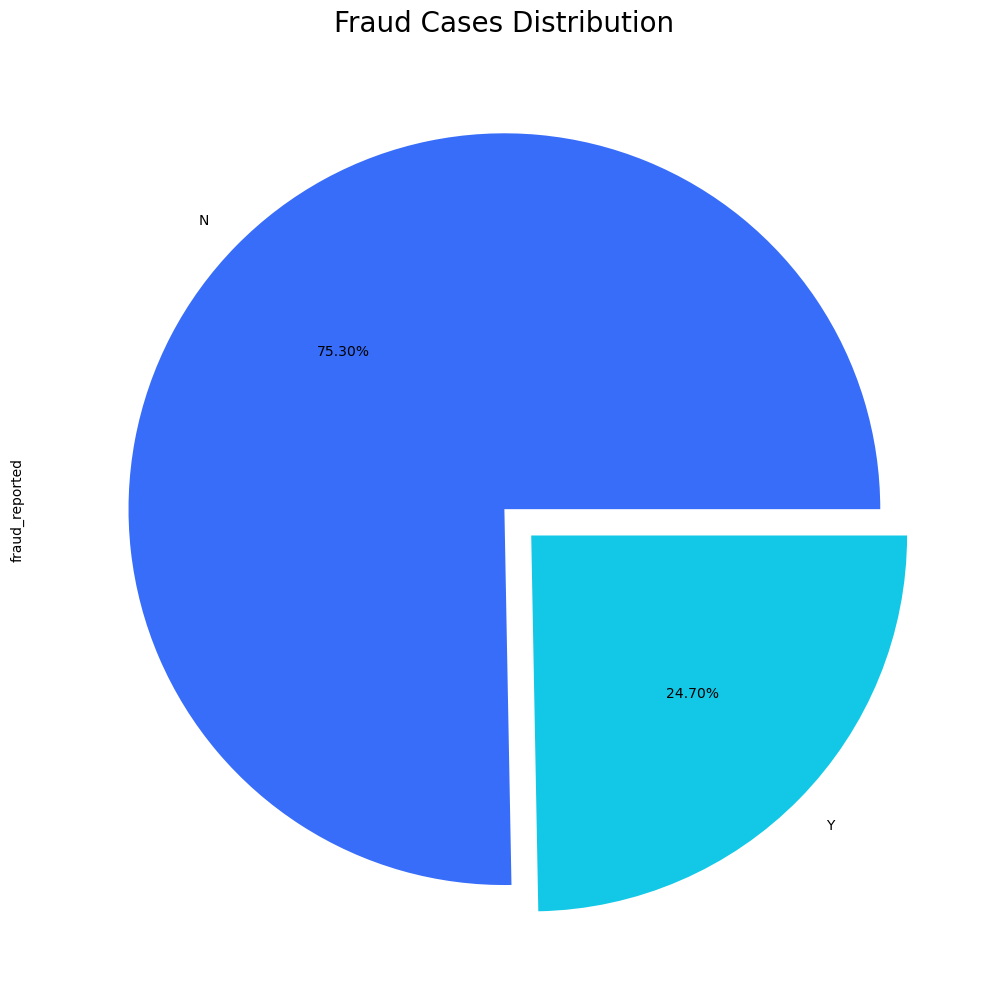

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1,],autopct='%1.2f%%')
plt.title('Fraud Cases Distribution', fontsize=20)
plt.tight_layout()
plt.show()

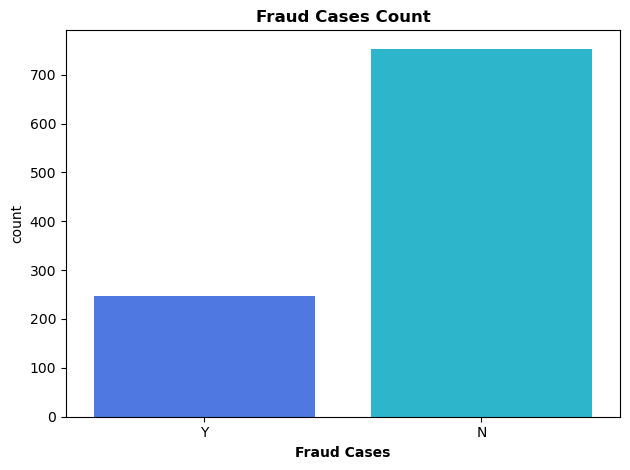

In [30]:
sns.countplot('fraud_reported',data=df)
plt.title('Fraud Cases Count',fontsize=12,fontweight ='bold')
plt.xlabel("Fraud Cases",fontsize=10,fontweight ='bold')
plt.show()

### Observation:
1. Out of all cases around 24.7 % cases are Fraud.
2. 'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

In [31]:
# Analysing Age vs Fraud
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


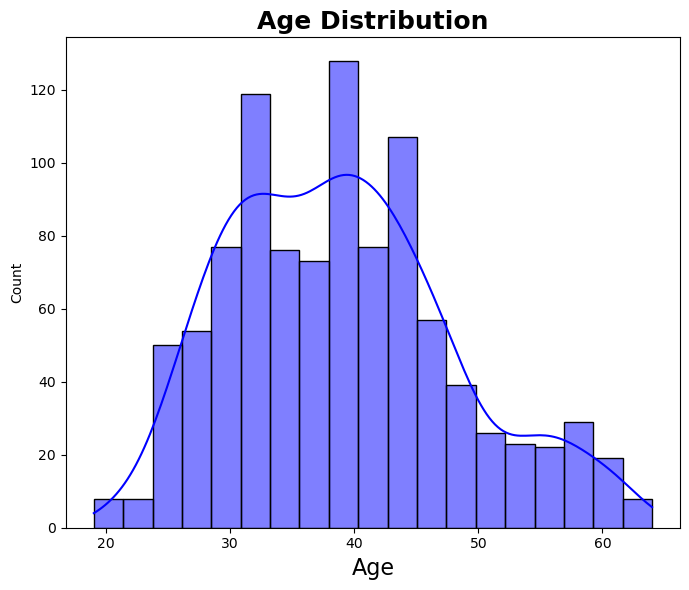

In [32]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [33]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])


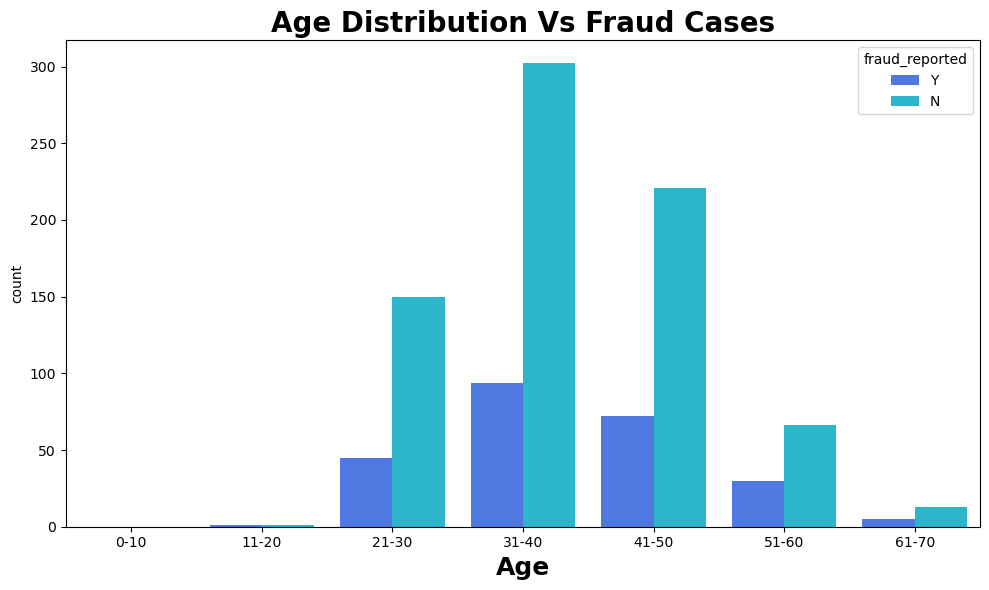

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

### Observation:
1. Maximum fraud cases comes from people with age group of 31-50 year.
2. Very few cases in 60+ year old peoples.

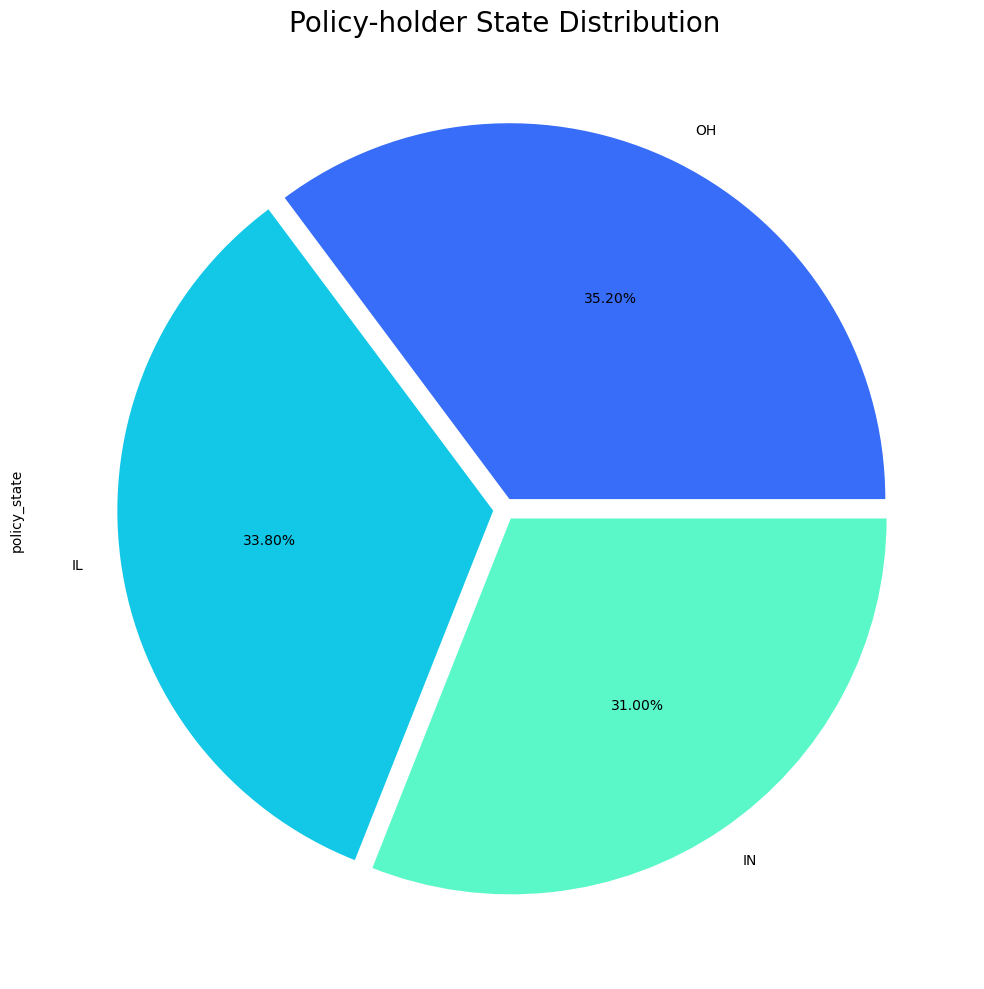

In [35]:
#Policy State Vs Fraud cases
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%1.2f%%')
plt.title('Policy-holder State Distribution', fontsize=20)
plt.tight_layout()
plt.show()

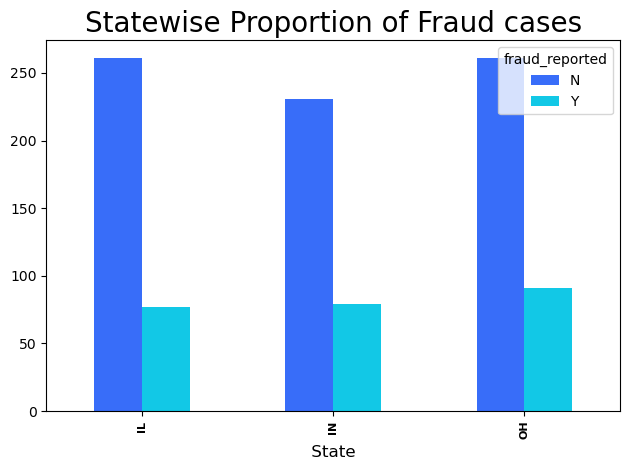

In [40]:
table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Statewise Proportion of Fraud cases',fontsize=20)
plt.xlabel(" State ",fontsize=12)
plt.xticks(fontsize=8,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation:
1. Almost same amout of cases come from each state.
2. Maximum fraud cases come from state of Ohio.

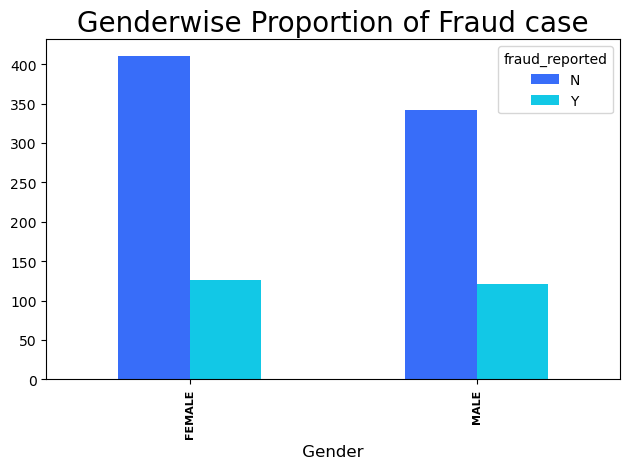

In [41]:
# Insured Gender VS Fraud cases
table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Genderwise Proportion of Fraud case',fontsize=20)
plt.xlabel(" Gender ",fontsize=12)
plt.xticks(fontsize=8,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation:
1. Number of claims come from female is higher than which reported by male insured.
2. Almost same amount of fraud cases comes from same gender.

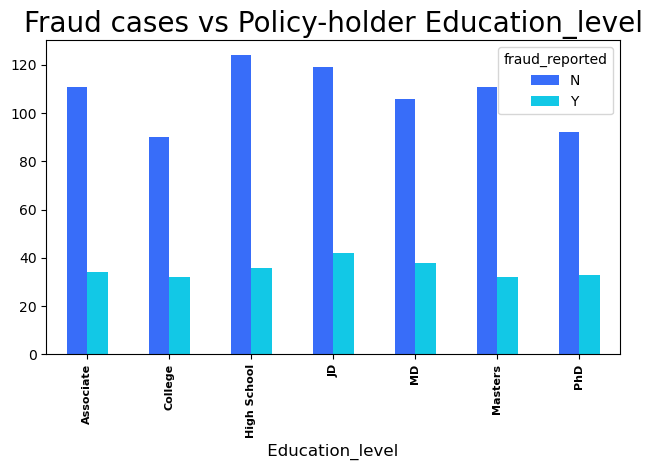

In [42]:
# Education_level  VS Fraud cases
table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases vs Policy-holder Education_level',fontsize=20)
plt.xlabel(" Education_level ",fontsize=12)
plt.xticks(fontsize=8,fontweight ='bold')
plt.tight_layout()
plt.show()

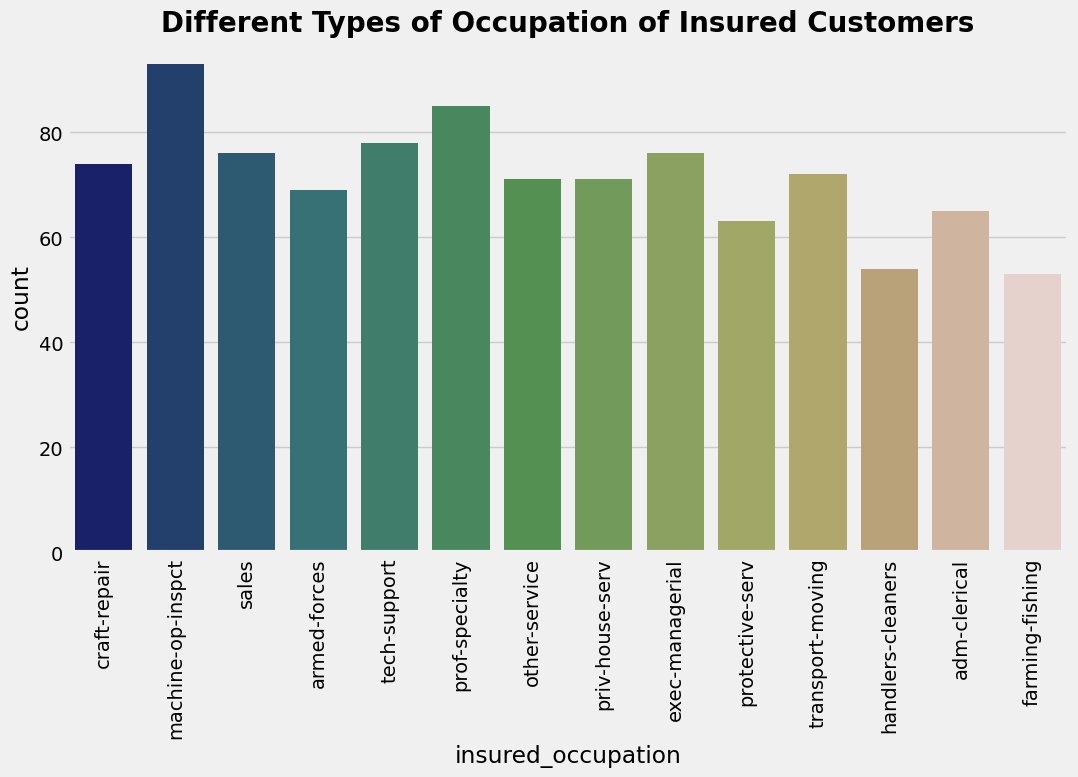

In [43]:
## Occupation of Insured Customers
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

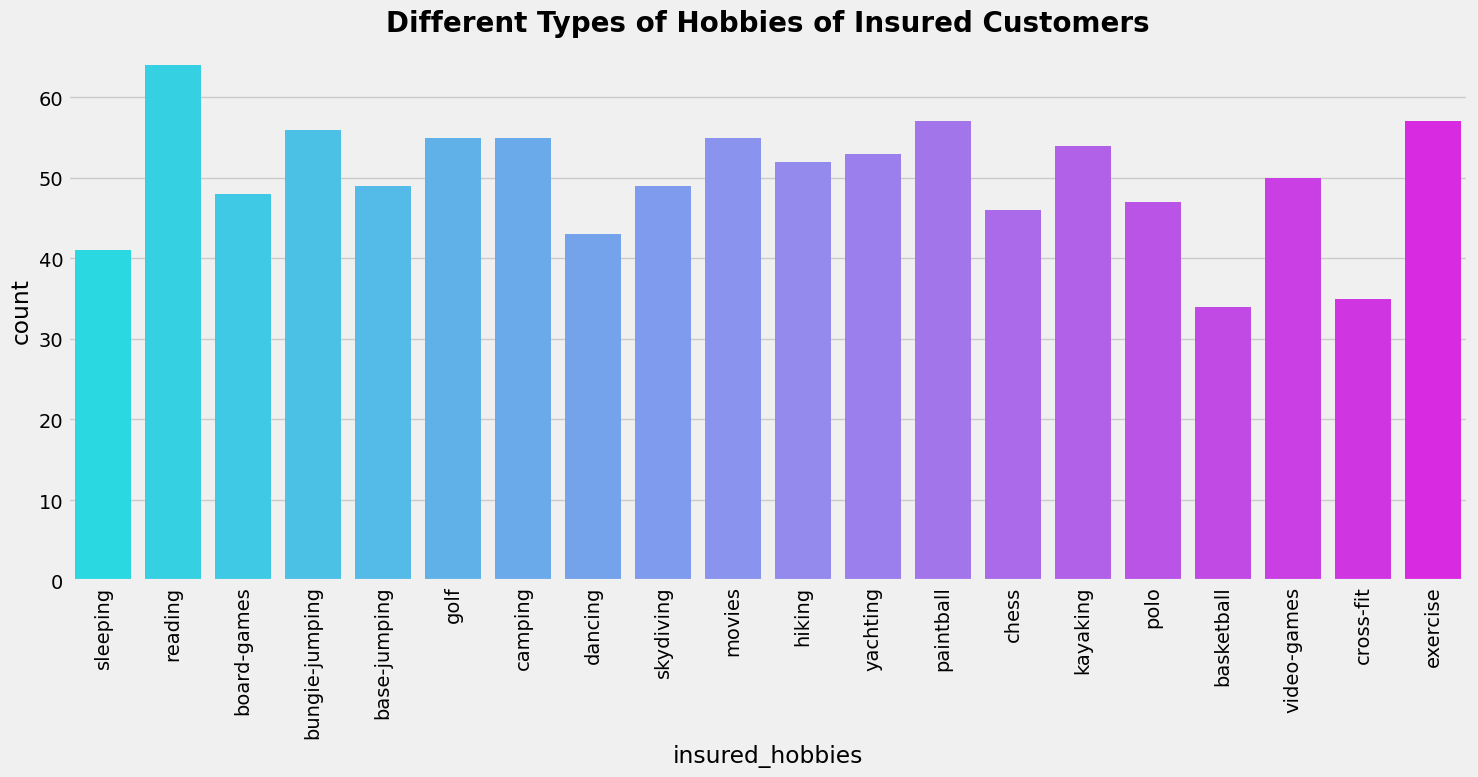

In [44]:
# Hobbies of Insured Customers
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

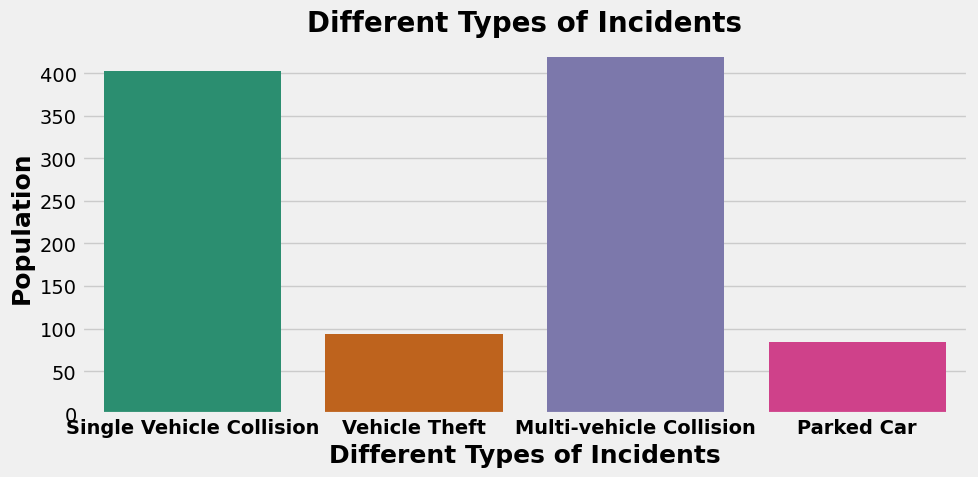

In [45]:
#Different Types of Incidents Vs Fraud cases
 
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

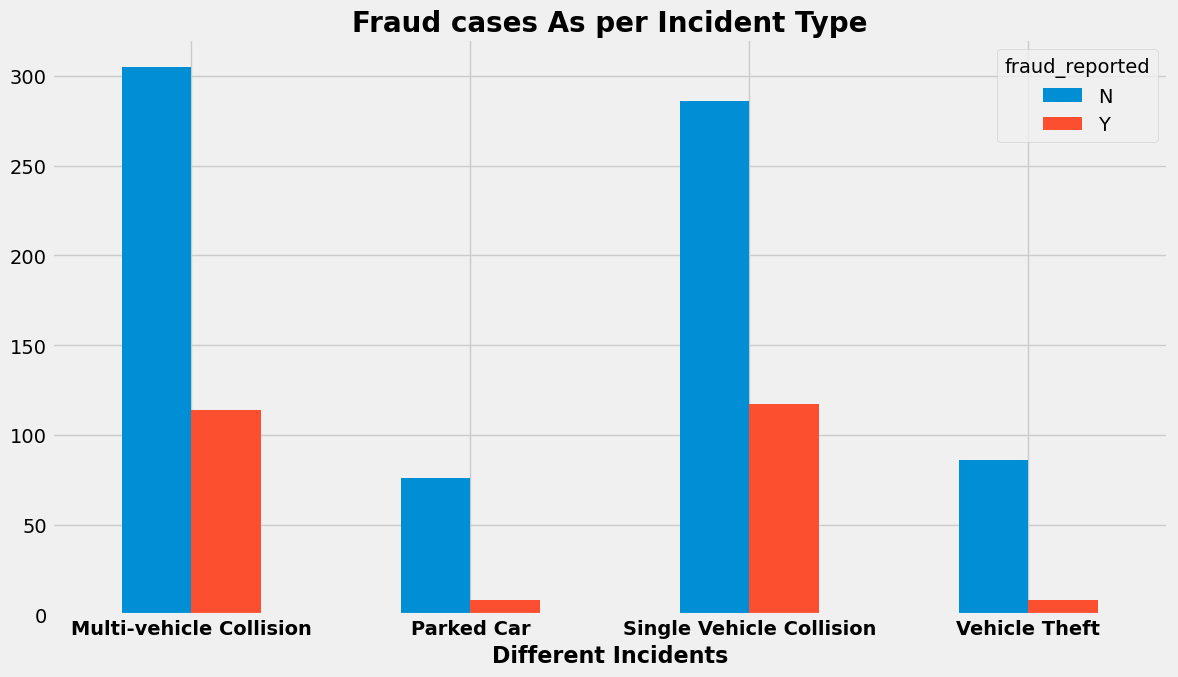

In [46]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### Observation :
1. Most of case comes from Multi-vehicle and single vehicle collision.
2. Some claims are due to automobile robbery.

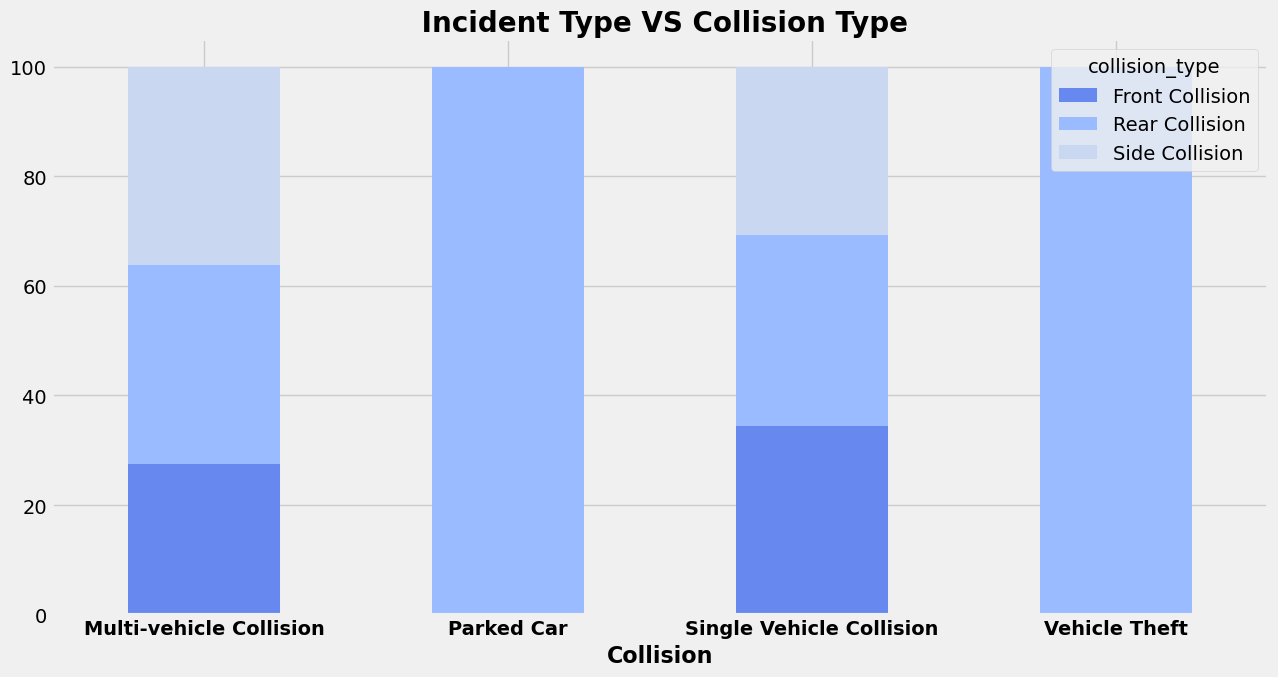

In [47]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

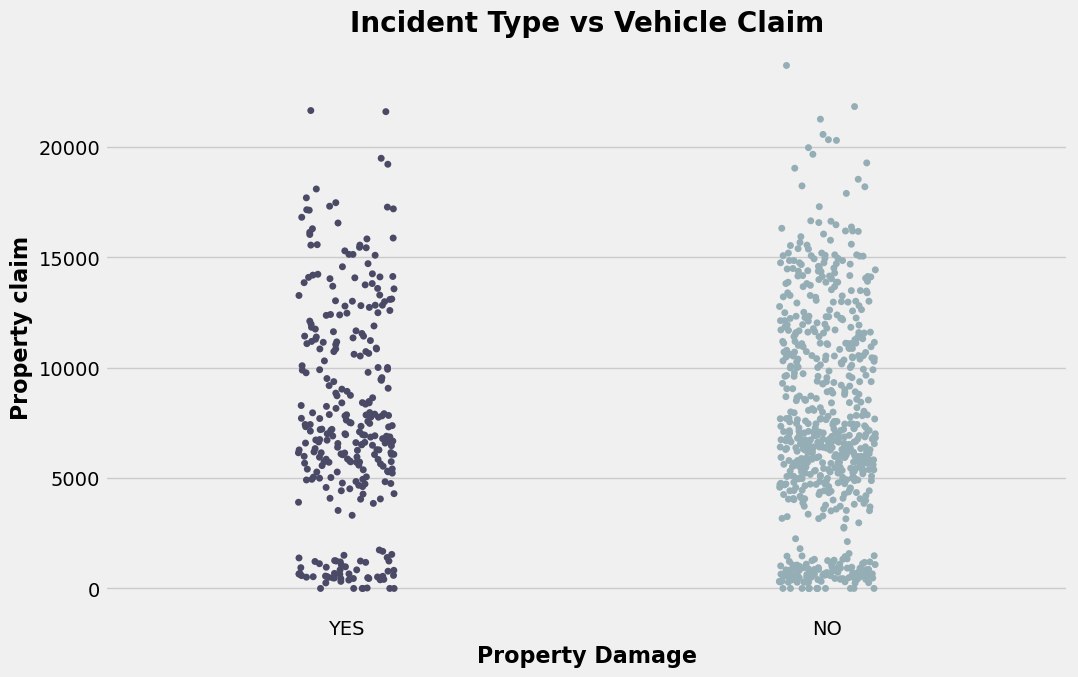

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

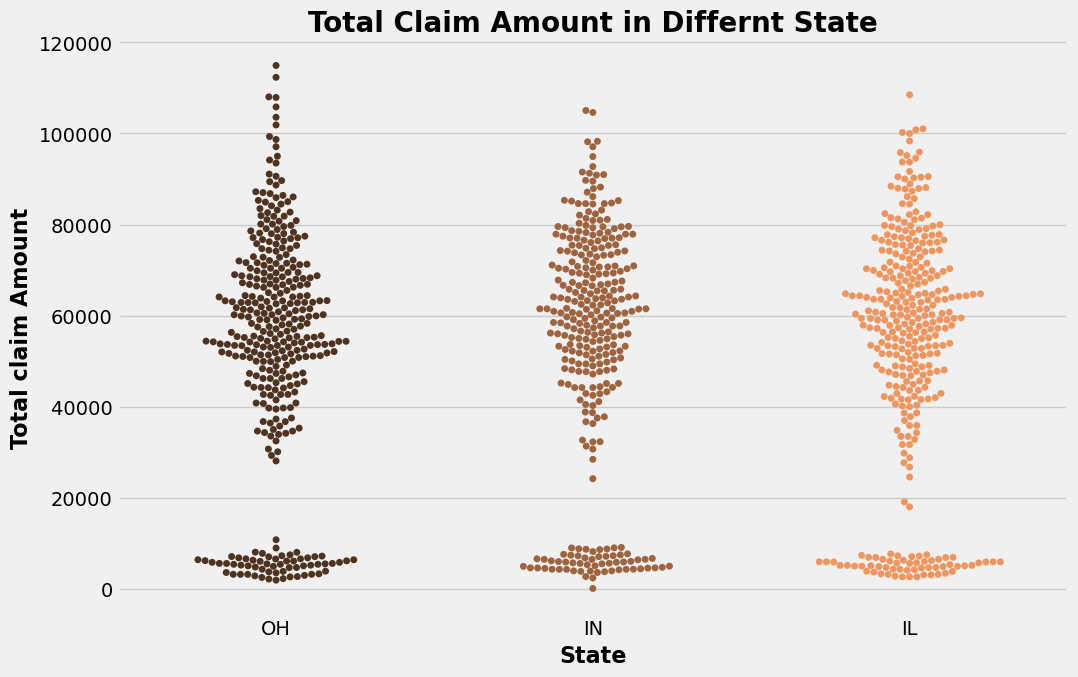

In [49]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

### Encoding categorical data

In [50]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [51]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,1,2,17,10,2014,25,1,11,41-50
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,1,1,2,27,6,2006,21,1,8,41-50
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,0,0,1,9,6,2000,22,2,8,21-30
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,1,2,25,5,1990,1,10,1,41-50
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,2,0,6,6,2014,17,2,6,41-50


In [52]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [53]:
len(Numerical)

21

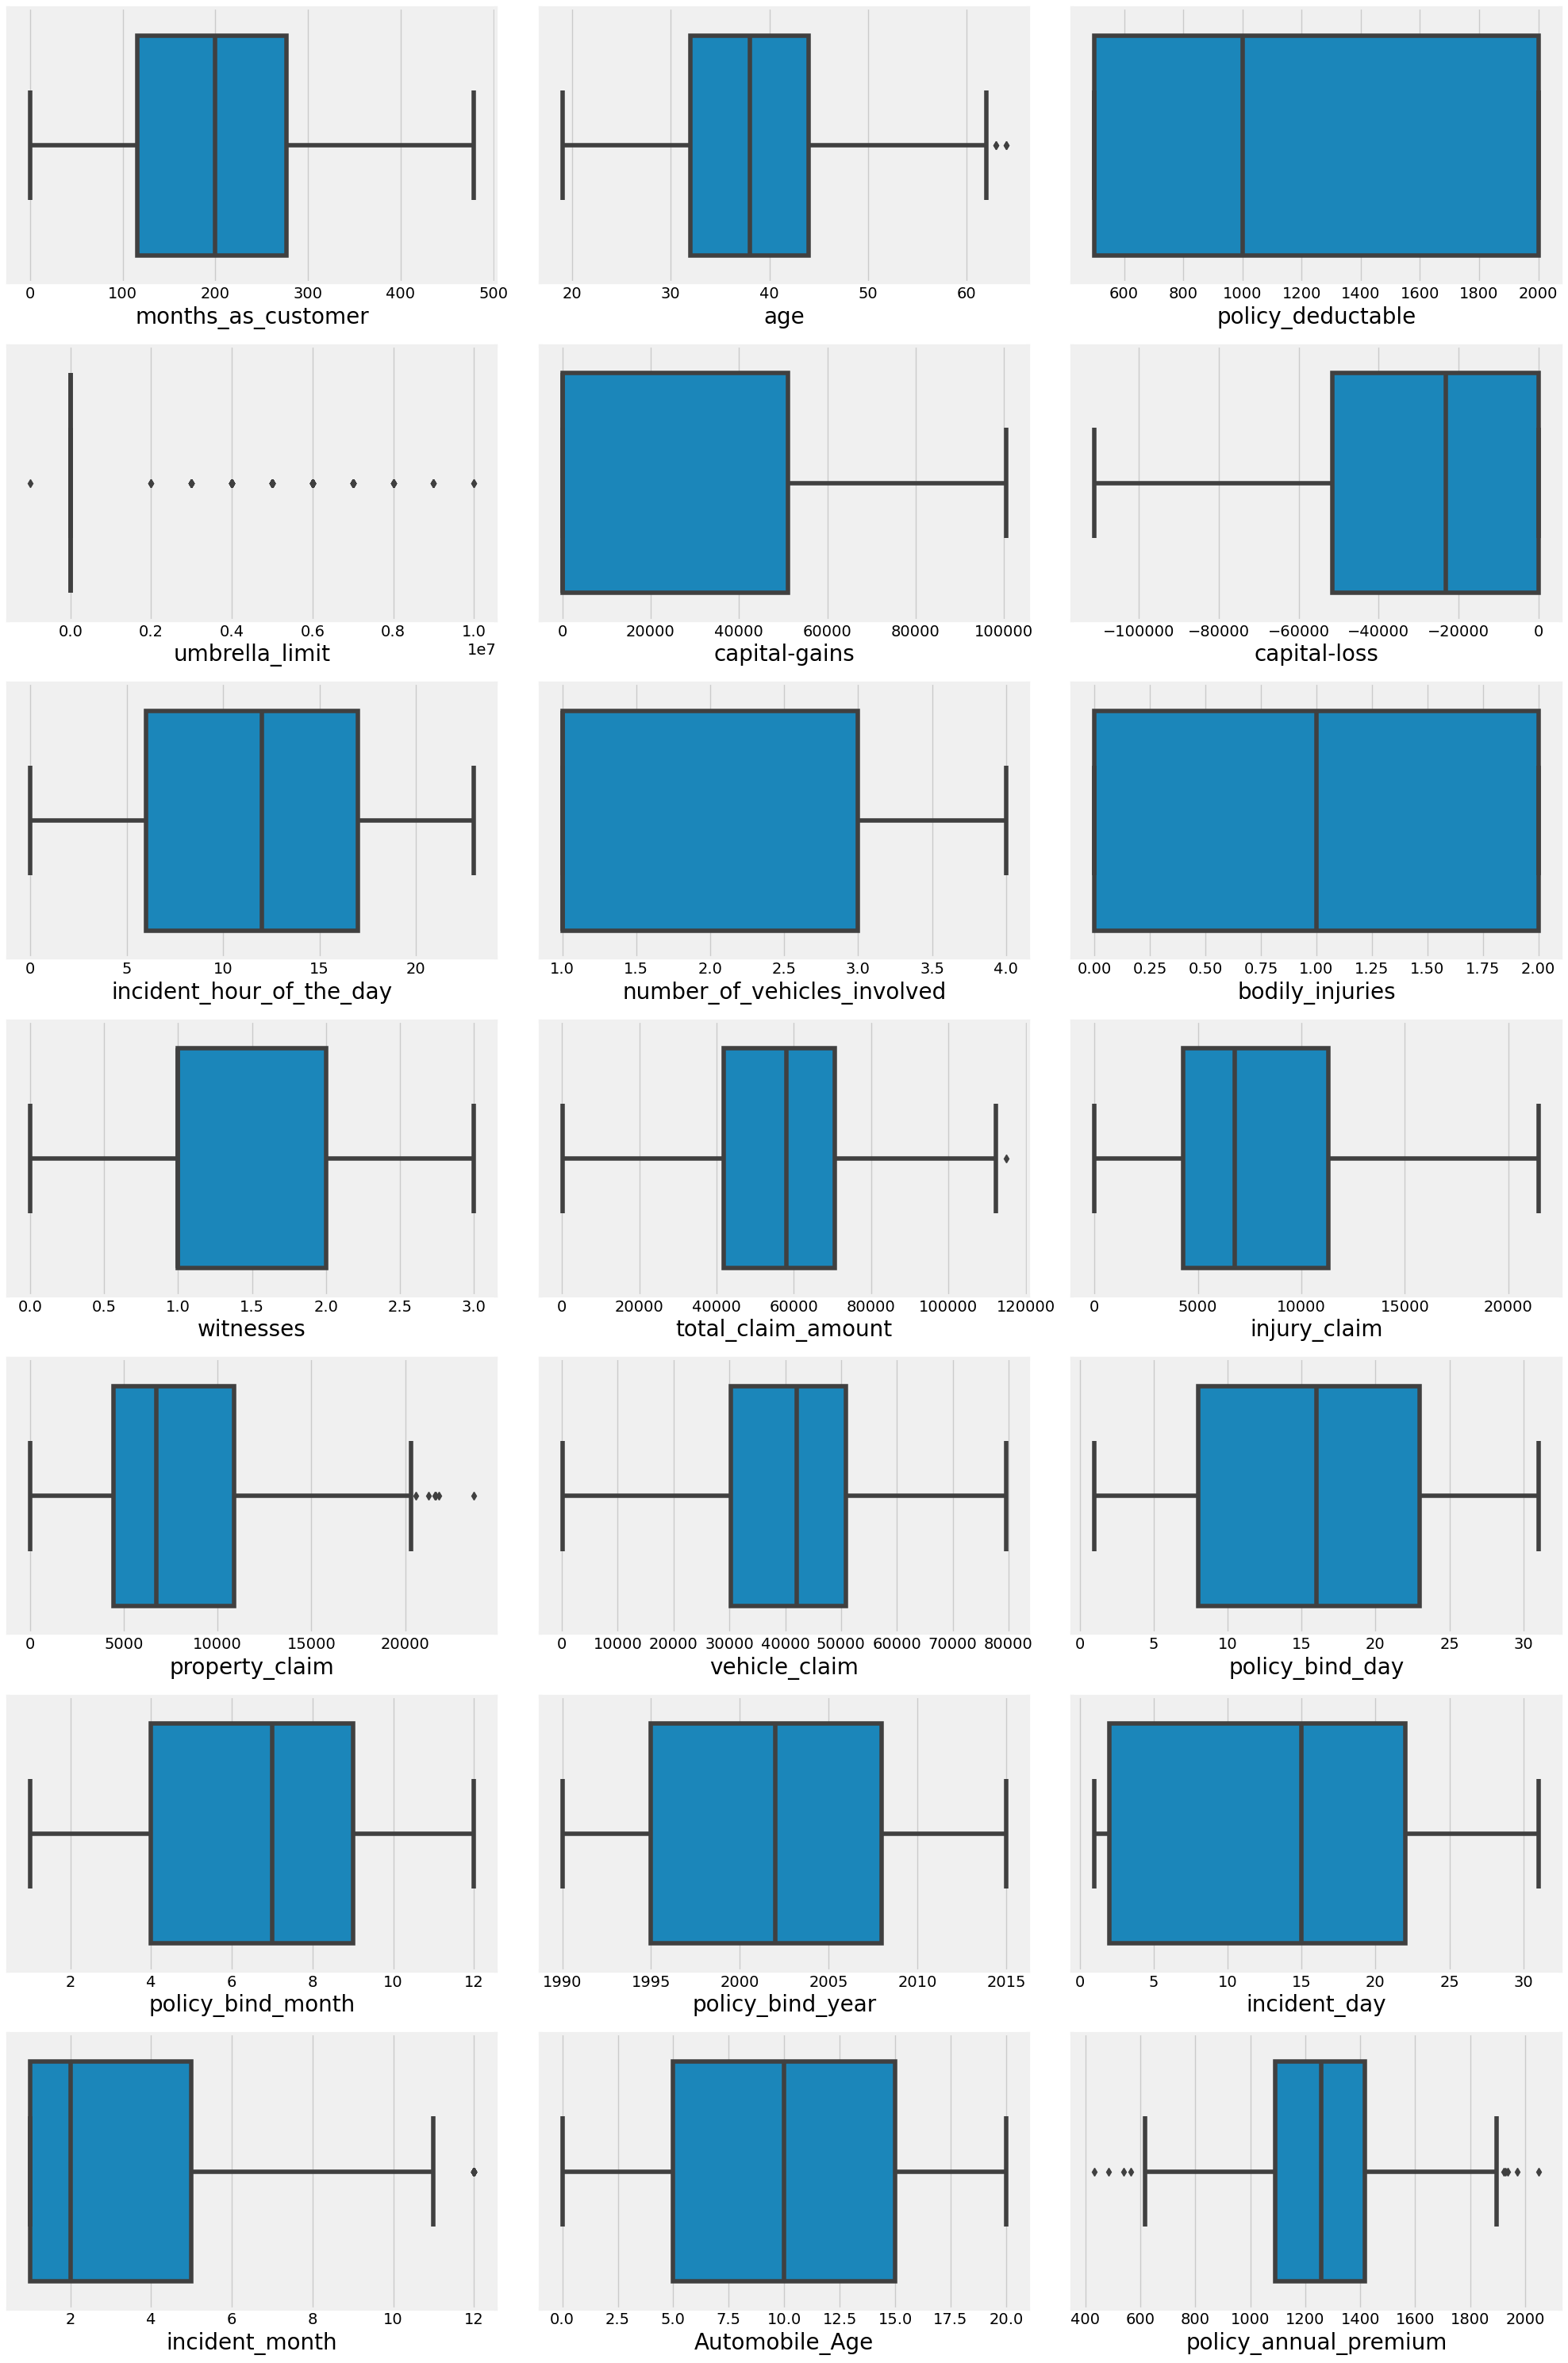

In [54]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* From Boxplot we can see outliers exist dataset.

In [62]:
df.drop('age_bins',axis = 1,inplace = True)

In [63]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,1,1,2,17,10,2014,25,1,11
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,12,1,1,2,27,6,2006,21,1,8
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,30,0,0,1,9,6,2000,22,2,8
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,34,1,1,2,25,5,1990,1,10,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,31,0,2,0,6,6,2014,17,2,6


In [64]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


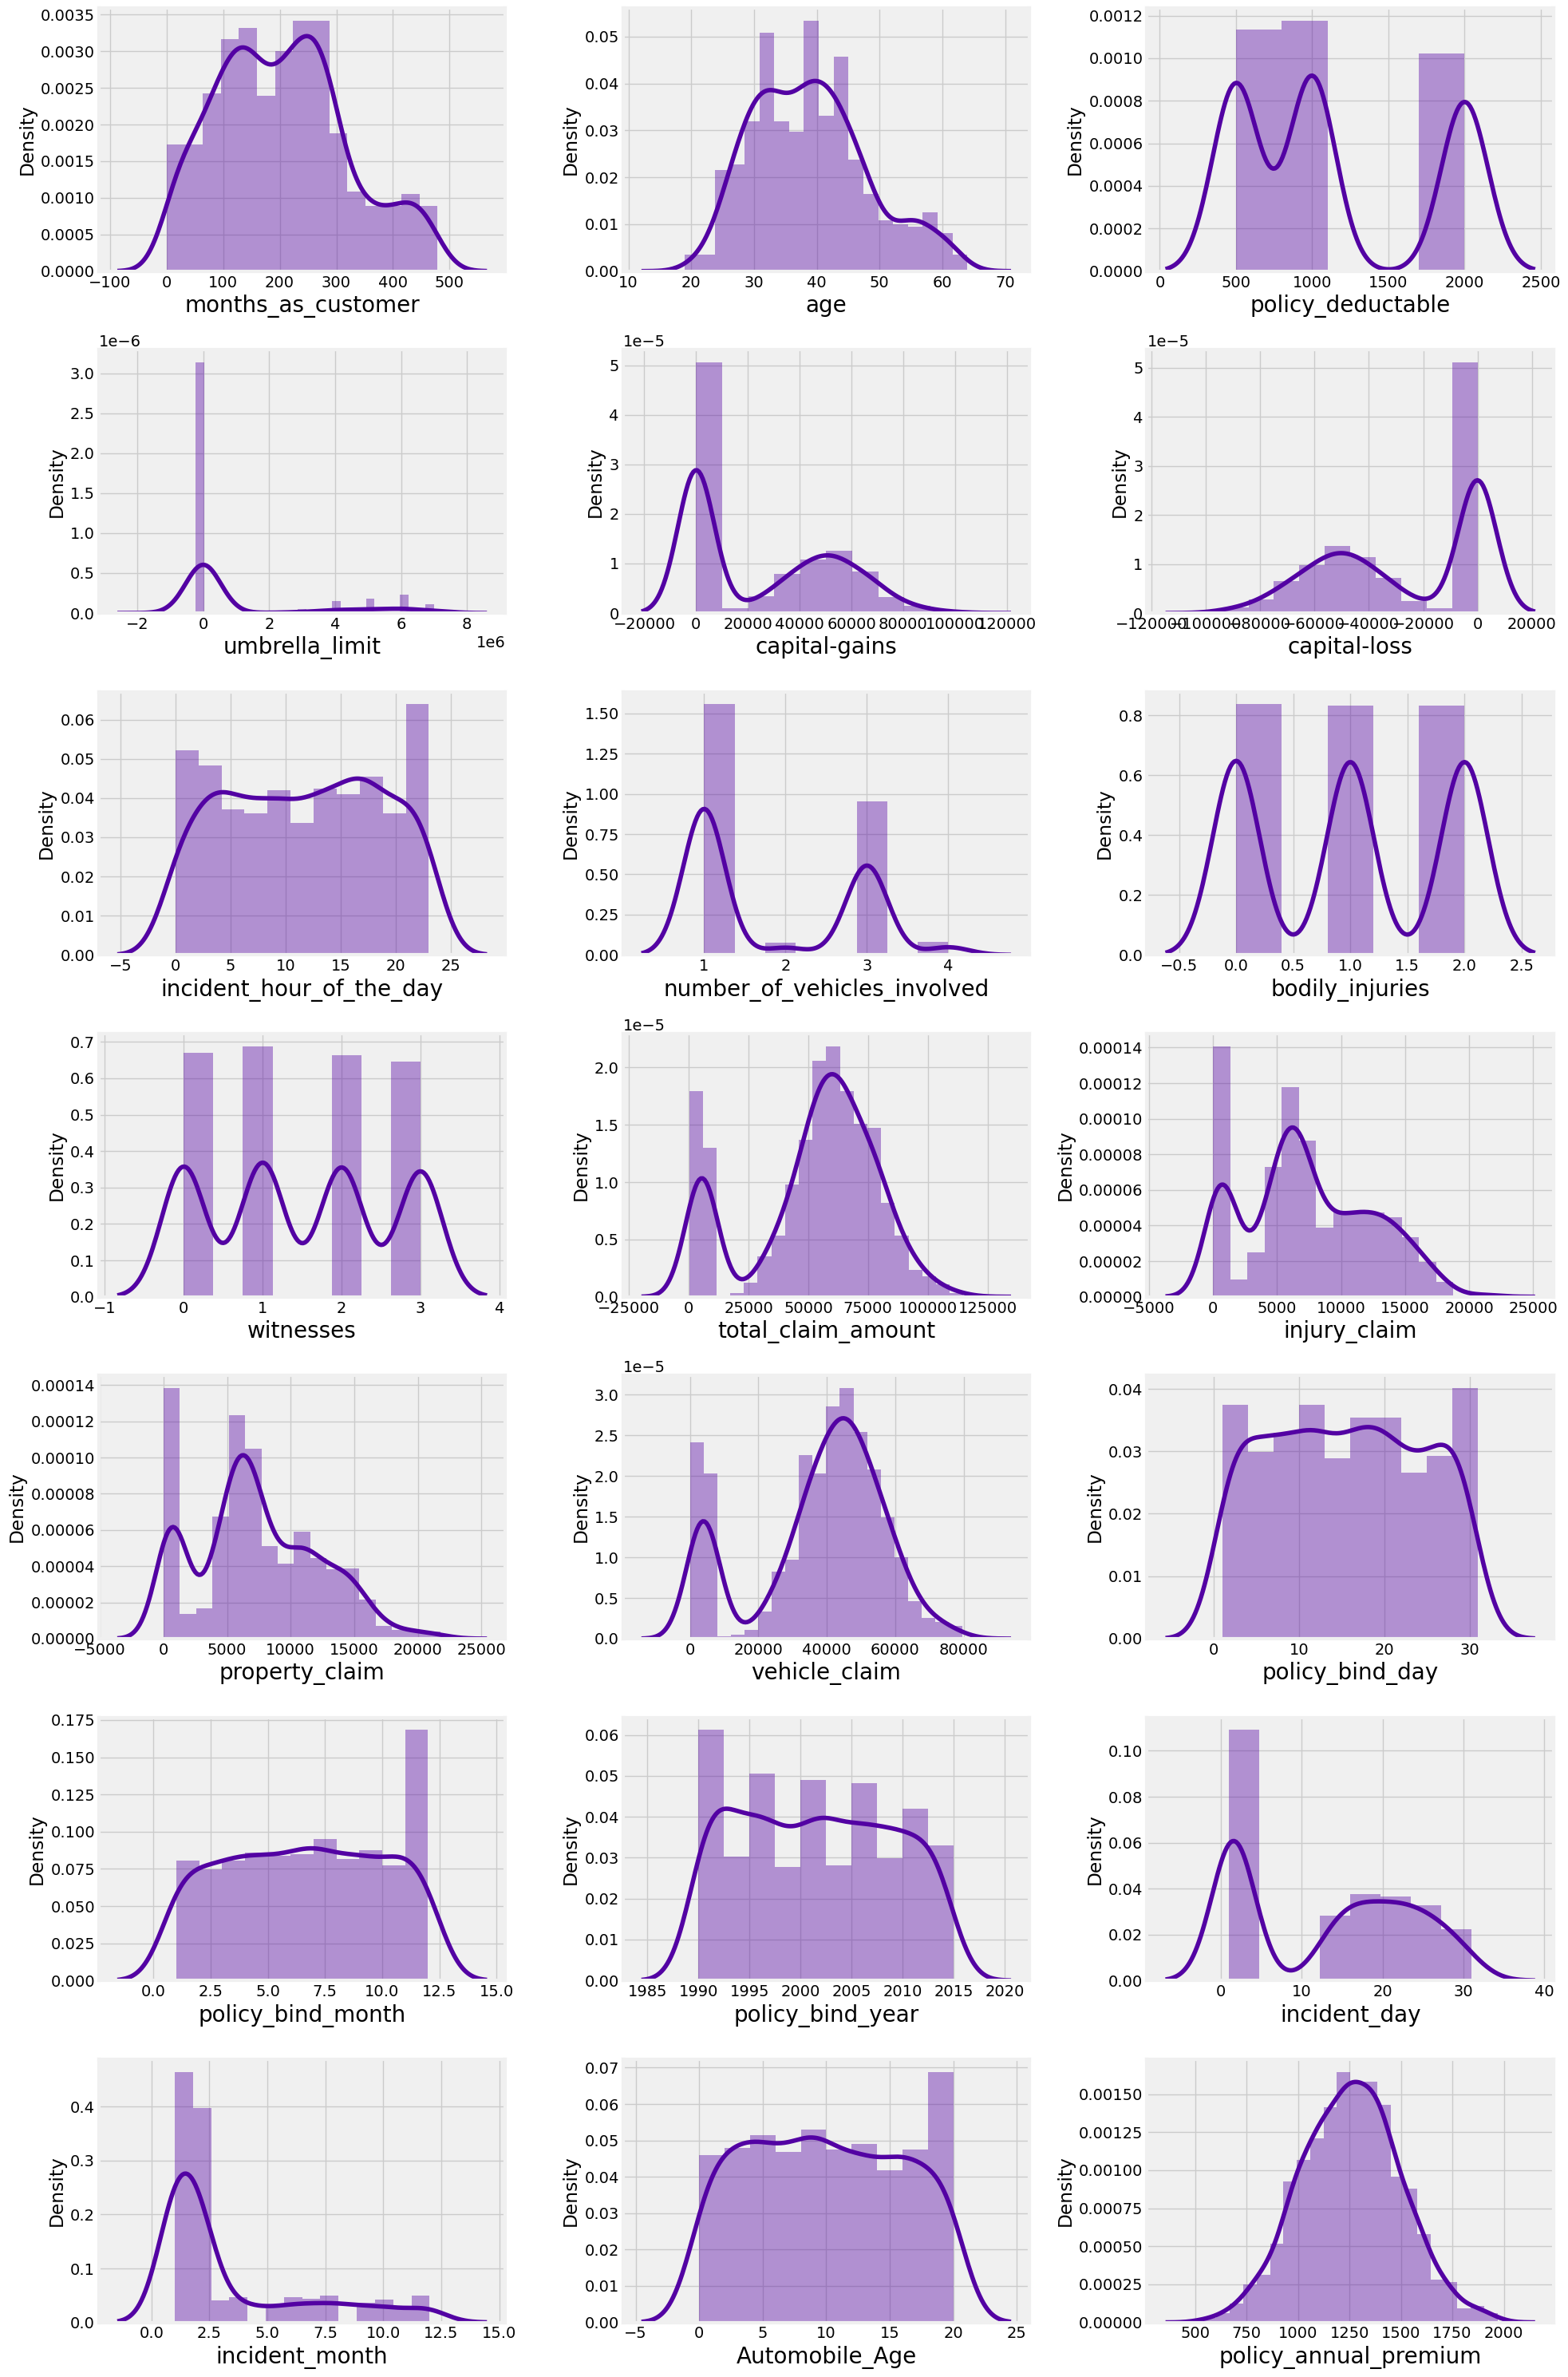

In [65]:
# Skewness of features
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [66]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

In [67]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [68]:
# Checking Skewness after transformation
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

In [69]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.018213,0.059644,-0.000731,0.006925,-0.089358,...,0.005130,0.021285,-0.021855,0.007121,0.050824,0.004207,-0.041914,-0.010538,0.019242,-0.000869
age,0.922960,1.000000,-0.020012,0.032036,0.005330,0.013256,0.073790,0.001647,0.014798,-0.079099,...,0.015322,0.013279,-0.013323,0.011258,0.053147,0.014492,-0.031709,-0.005843,0.018221,-0.005594
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.010921,-0.018002,-0.027173,-0.025357,-0.039501,...,-0.018008,0.034587,0.001653,0.029007,-0.000583,0.073692,-0.003045,0.016049,0.027889,0.001160
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.013471,-0.006977,0.014101,-0.053888,-0.001923,...,-0.002591,0.015774,0.009912,-0.014554,0.013395,-0.054208,-0.054041,-0.018115,-0.010288,-0.030569
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.014107,0.041312,-0.021400,0.027827,-0.014226,...,-0.038226,-0.012686,0.032654,-0.001868,-0.032681,-0.031608,0.002433,0.018671,0.009544,0.042446
umbrella_limit,0.018213,0.013256,-0.010921,0.013471,-0.014107,1.000000,0.018068,-0.030887,0.003973,-0.034098,...,0.015360,0.044729,0.013504,0.025418,-0.030416,-0.001072,0.049032,-0.031948,0.029210,-0.027952
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018068,1.000000,0.010068,-0.007440,-0.020928,...,-0.018657,0.020582,-0.003405,0.071995,0.047690,-0.003125,-0.031230,-0.017208,0.036916,0.033336
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.030887,0.010068,1.000000,-0.025394,0.025229,...,0.042735,0.013116,0.008337,-0.005150,0.018977,-0.011963,0.016874,-0.051772,0.069564,-0.054438
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.003973,-0.007440,-0.025394,1.000000,-0.010375,...,0.015152,0.000277,0.016461,-0.004376,0.003377,0.020690,-0.026467,-0.020565,0.013989,-0.000915
insured_hobbies,-0.089358,-0.079099,-0.039501,-0.001923,-0.014226,-0.034098,-0.020928,0.025229,-0.010375,1.000000,...,0.034818,-0.048181,-0.003695,0.035959,0.035344,-0.003806,-0.020370,0.016051,-0.001147,0.018361


In [77]:
# Balanceing Imbalanced target feature
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [78]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,6.913265,months_as_customer
1,6.923763,age
2,1.038507,policy_state
3,1.050150,policy_deductable
4,1.038143,policy_annual_premium
5,1.045543,umbrella_limit
6,1.038392,insured_sex
7,1.050389,insured_education_level
8,1.017476,insured_occupation
9,1.052064,insured_hobbies


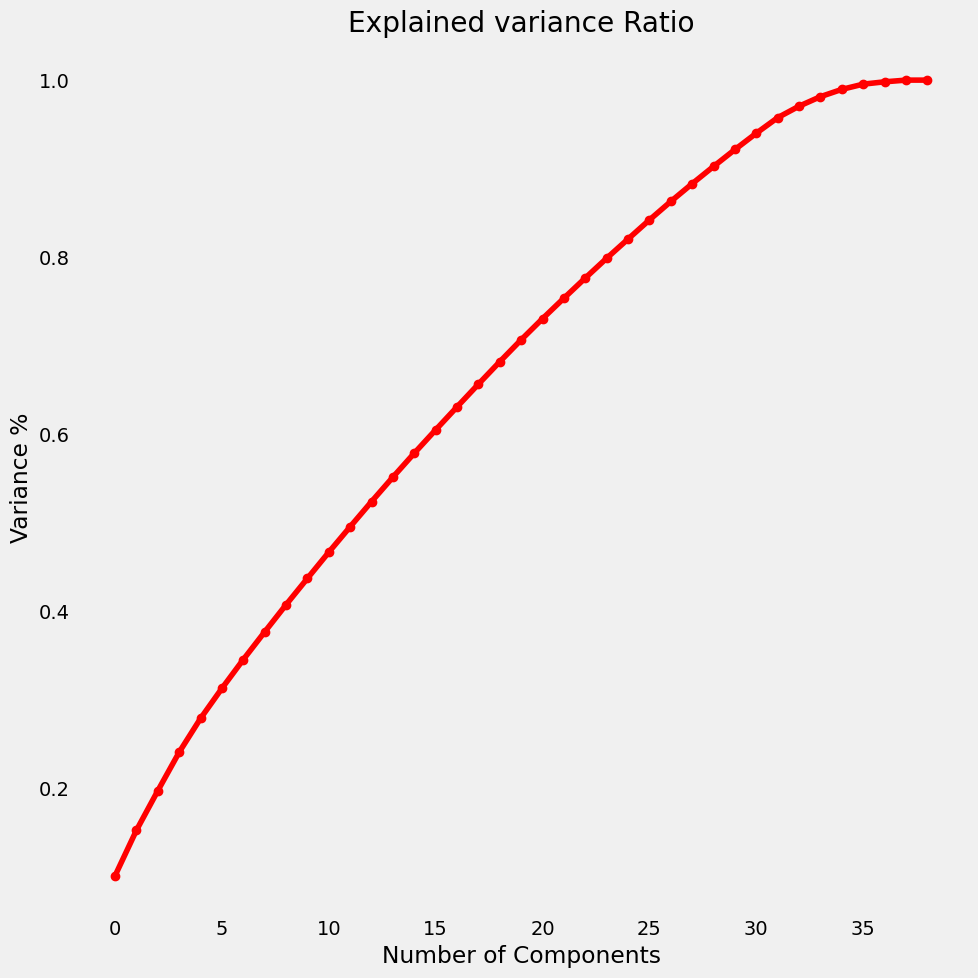

In [81]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

* AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [82]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [83]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (686, 28)
Training target vector size: (686,)
Test feature matrix size: (294, 28)
Test target vector size: (294,)


In [88]:
# Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8197278911564626 on Random_state 179


In [90]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(Y_test, y_pred))
    print('\n')
    print("="*50)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.7142857142857143


Confusion matrix : [[195  22]
 [ 62  15]]


Classification Report :               precision    recall  f1-score   support

           0       0.76      0.90      0.82       217
           1       0.41      0.19      0.26        77

    accuracy                           0.71       294
   macro avg       0.58      0.55      0.54       294
weighted avg       0.67      0.71      0.68       294



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.7312925170068028


Confusion matrix : [[213   4]
 [ 75   2]]


Classification Report :               precision    recall  f1-score   support

           0       0.74      0.98      0.84       217
           1       0.33      0.03      0.05        77

    accuracy                           0.73       294
   macro avg       0.54      0.50      0.45       294
weighted avg       0.63      0.73      0.64       294



C

In [91]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('='*50)



Cross Validation Score LogisticRegression() :

Score : [0.79591837 0.71428571 0.73469388 0.79081633 0.75510204]
Mean Score : 0.7581632653061223
Std deviation : 0.03155025476273532




Cross Validation Score SVC() :

Score : [0.76530612 0.72959184 0.74489796 0.76020408 0.75510204]
Mean Score : 0.7510204081632652
Std deviation : 0.012662932291827397




Cross Validation Score GaussianNB() :

Score : [0.75510204 0.7244898  0.71938776 0.77040816 0.78061224]
Mean Score : 0.75
Std deviation : 0.02436191099247618




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68877551 0.65816327 0.65306122 0.65306122 0.66326531]
Mean Score : 0.6632653061224489
Std deviation : 0.013304494704495233




Cross Validation Score RandomForestClassifier() :

Score : [0.74489796 0.73469388 0.75510204 0.75510204 0.75510204]
Mean Score : 0.7489795918367346
Std deviation : 0.008163265306122408




Cross Validation Score ExtraTreesClassifier() :

Score : [0.76020408 0.75510204 0.76530612 0.75510204 0.

In [92]:
# Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV

In [93]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [94]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=2)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_sp

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_sa

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_sa

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_sp

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_sa

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_sa

[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_sp

[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_sa

[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_sa

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_fe

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, 

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_fe

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20

[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=20, 

[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=30, max_fe

[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=30

[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400; total time=   0.5s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, 

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [95]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 100}

## Final Model

In [96]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 100, max_depth=30 ,
                                 min_samples_split= 5, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.7380952380952381


In [101]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.obj')

['Insurance_claims_Final.obj']